<a href="https://colab.research.google.com/github/Shabucode/Microsoft_Phi3_Hugging_Face_Multimodal/blob/main/Microsoft_Phi_3_vision_128k_instruct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q torch transformers accelerate bitsandbytes

In [ ]:
!pip install flash_attn

In [ ]:
from PIL import Image
import requests
from transformers import AutoModelForCausalLM
from transformers import AutoProcessor

model_id = "microsoft/Phi-3-vision-128k-instruct"

model = AutoModelForCausalLM.from_pretrained(model_id, device_map="cuda", trust_remote_code=True, torch_dtype="auto")

processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

messages = [
    {"role": "user", "content": "<|image_1|>\nWhat is shown in this image?"},
    {"role": "assistant", "content": "The chart displays the percentage of respondents who agree with various statements about their preparedness for meetings. It shows five categories: 'Having clear and pre-defined goals for meetings', 'Knowing where to find the information I need for a meeting', 'Understanding my exact role and responsibilities when I'm invited', 'Having tools to manage admin tasks like note-taking or summarization', and 'Having more focus time to sufficiently prepare for meetings'. Each category has an associated bar indicating the level of agreement, measured on a scale from 0% to 100%."},
    {"role": "user", "content": "Provide insightful questions to spark discussion."}
]

url = "https://assets-c4akfrf5b4d3f4b7.z01.azurefd.net/assets/2024/04/BMDataViz_661fb89f3845e.png"
image = Image.open(requests.get(url, stream=True).raw)

config.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

configuration_phi3_v.py:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- configuration_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3_v.py:   0%|          | 0.00/75.4k [00:00<?, ?B/s]

image_embedding_phi3_v.py:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_embedding_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- modeling_phi3_v.py
- image_embedding_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.35G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

processing_phi3_v.py:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

image_processing_phi3_v.py:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- processing_phi3_v.py
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.85M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


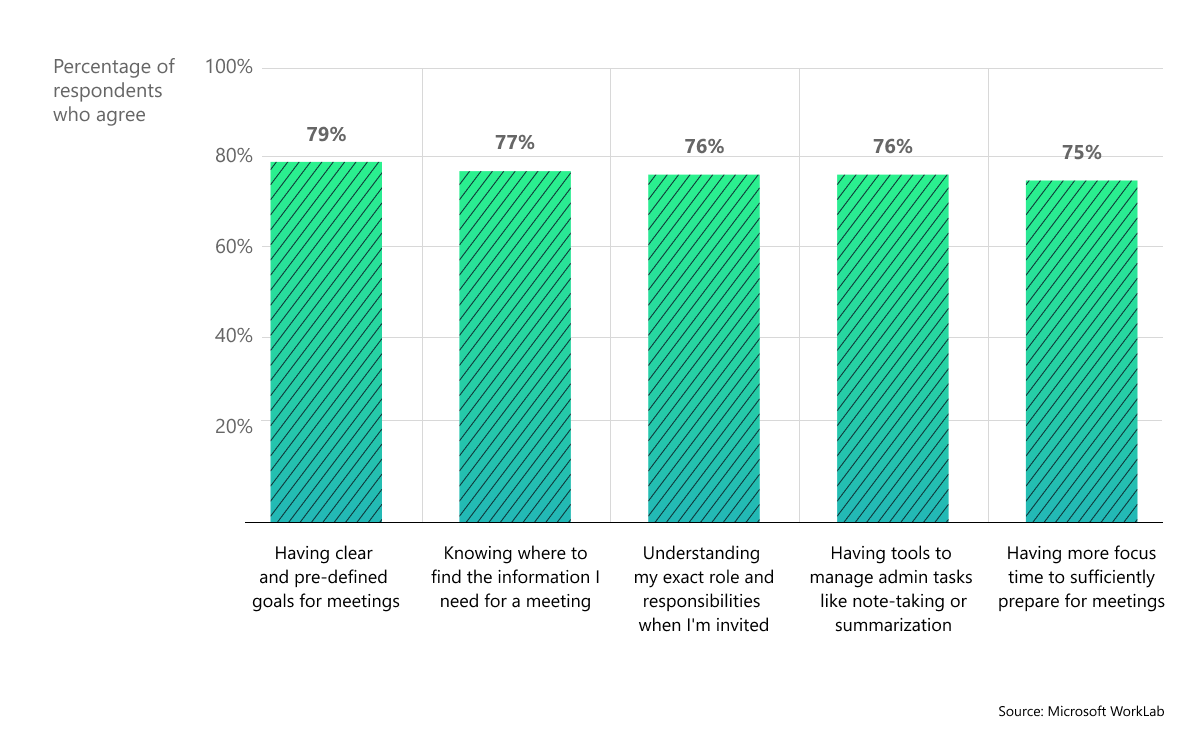

In [ ]:
image

In [ ]:
prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

In [ ]:
prompt

"<|user|>\n<|image_1|>\nWhat is shown in this image?<|end|>\n<|assistant|>\nThe chart displays the percentage of respondents who agree with various statements about their preparedness for meetings. It shows five categories: 'Having clear and pre-defined goals for meetings', 'Knowing where to find the information I need for a meeting', 'Understanding my exact role and responsibilities when I'm invited', 'Having tools to manage admin tasks like note-taking or summarization', and 'Having more focus time to sufficiently prepare for meetings'. Each category has an associated bar indicating the level of agreement, measured on a scale from 0% to 100%.<|end|>\n<|user|>\nProvide insightful questions to spark discussion.<|end|>\n<|assistant|>\n"

In [ ]:
inputs

{'input_ids': tensor([[    1, 32010, 29871,  ..., 29871,    13, 32001]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[[ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           ...,
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303]],

          [[ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           ...,
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0

In [ ]:
generation_args = {
    "max_new_tokens": 500,
    "temperature": 0.0,
    "do_sample": False,
}

In [ ]:
generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

print(response)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


1. What are the most significant barriers to meeting preparedness according to the respondents?
2. How does the level of agreement with each statement correlate with the respondents' overall satisfaction with their meetings?
3. Are there any notable differences in agreement levels between different demographics or job roles?
4. What strategies have been most effective in helping respondents prepare for meetings, based on their feedback?
5. How might organizations use this data to improve meeting preparation and effectiveness?
